<a href="https://colab.research.google.com/github/lauracantik/mathtools/blob/main/Tugas04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

#data set link
dataset = pd.read_csv("https://raw.githubusercontent.com/lauracantik/mathtools/main/healthcare-dataset-stroke-data.csv");

In [2]:
# menampilkan data pada tabel
pd.DataFrame(dataset)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
# statistik data
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
# Data Description
# menghapus kolom yang tidak perlu

dataset = dataset.drop(columns='id')

In [6]:
# mengecek tipe data dan count data dari setiap kolom
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [21]:
# mengecek missing value
print(dataset.isnull())

# mengecek keseluruhan data jika ada value yang NULL
print(dataset.isnull().any())

# summerize missing value
print(dataset.isna().sum())

         id  gender    age  hypertension  heart_disease  ever_married  \
0     False   False  False         False          False         False   
1     False   False  False         False          False         False   
2     False   False  False         False          False         False   
3     False   False  False         False          False         False   
4     False   False  False         False          False         False   
...     ...     ...    ...           ...            ...           ...   
5105  False   False  False         False          False         False   
5106  False   False  False         False          False         False   
5107  False   False  False         False          False         False   
5108  False   False  False         False          False         False   
5109  False   False  False         False          False         False   

      work_type  Residence_type  avg_glucose_level    bmi  smoking_status  \
0         False           False              F

In [18]:
# perbaikan data terhadap data yang null
dataset['bmi'] = dataset['bmi'].fillna(dataset['bmi'].mean())
pd.DataFrame(dataset['bmi'])

dataset.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [23]:
# Mengecek apakah ada data < 0
# Jika ada data < 0 maka data tersebut tidak valid

temp = []
for column in dataset.columns:
  if dataset[column].dtype != 'object':
    temp.append({'column': column, 'count': len(np.where(dataset[column] < 0)[0])})
pd.DataFrame(temp)

,column,count
0,id,0
1,age,0
2,hypertension,0
3,heart_disease,0
4,avg_glucose_level,0
5,bmi,0
6,stroke,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


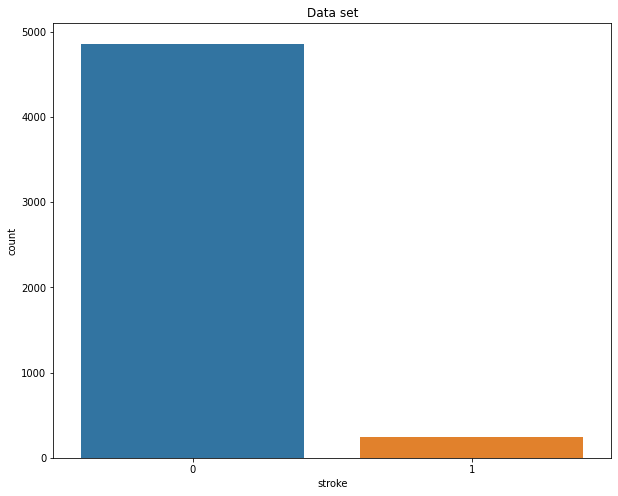

Count Not Stroke:  4861
Count Stroke:  249


In [31]:
# Transformasi data ke dalam bentuk bar plot

ax=plt.subplots(1,1,figsize=(10,8))
seaborn.countplot('stroke',data=dataset)
plt.title("Data set")
plt.show()

not_stroke  = np.where(dataset['stroke'] == 0)
stroke  = np.where(dataset['stroke'] == 1)


print("Count Not Stroke: ", len(not_stroke[0]))

print("Count Stroke: ", len(stroke[0]))